# ASSIGNMENT - 3

# import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the dataset

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# checking null vales

In [4]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data["Age"].fillna(data["Age"].mean(),inplace=True) 

In [8]:
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

In [9]:
del data["Cabin"]

In [10]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

# data visulaisation

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Sex', ylabel='Survived'>

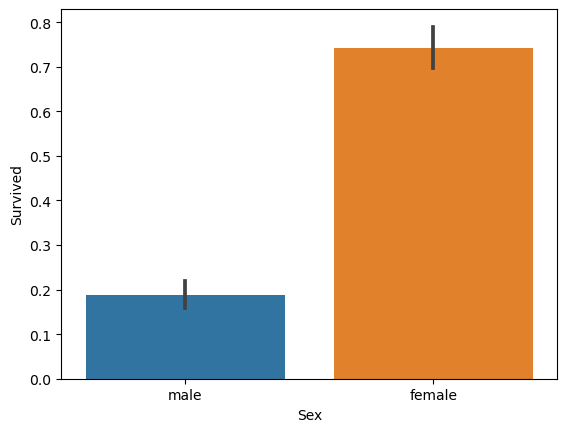

In [12]:
sns.barplot(data = data , x ="Sex" , y = "Survived")

C:\Users\salur\AppData\Local\Temp\ipykernel_984\2219291917.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),cbar = True , linewidths = 0.5 , annot = True)


<Axes: >

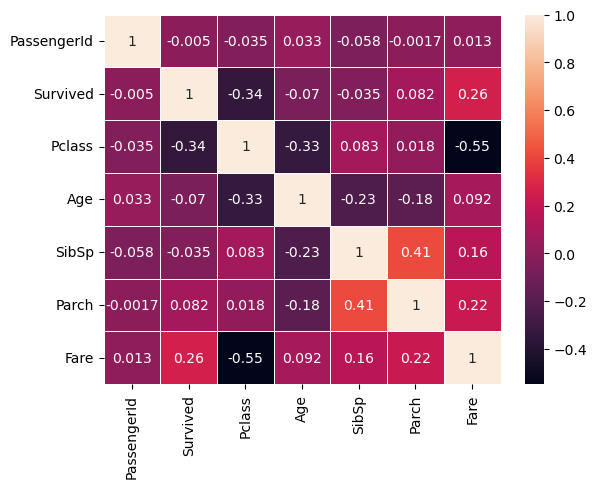

In [13]:
sns.heatmap(data.corr(),cbar = True , linewidths = 0.5 , annot = True)

<Axes: xlabel='Survived', ylabel='count'>

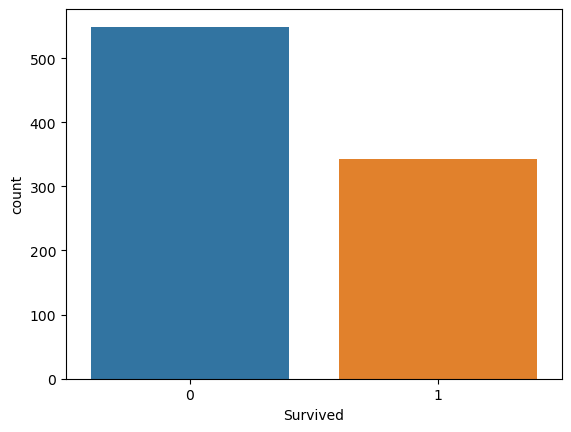

In [14]:
sns.countplot(data = data ,x = "Survived")

# outlier detection

<Axes: >

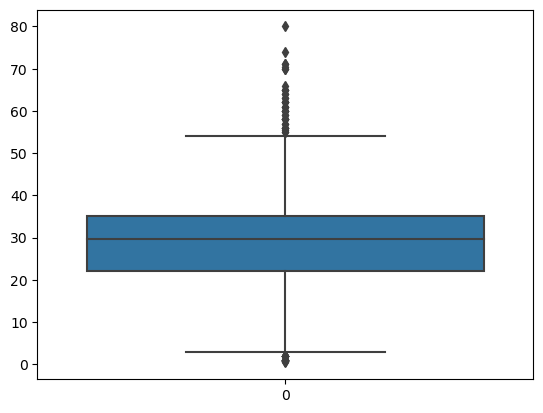

In [15]:
sns.boxplot(data.Age)

In [16]:
q1 = data.Age.quantile(0.25)
q3 = data.Age.quantile(0.75)

In [17]:
q1 

22.0

In [18]:
q3            #75% of data

35.0

In [19]:
IQR = q3 - q1
IQR

13.0

In [20]:
upper_limit = q3+(1.5 * IQR)
upper_limit 

54.5

In [21]:
lower_limit = q1 - (1.5 * IQR)
lower_limit

2.5

In [22]:
data.median()

C:\Users\salur\AppData\Local\Temp\ipykernel_984\4184645713.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


PassengerId    446.000000
Survived         0.000000
Pclass           3.000000
Age             29.699118
SibSp            0.000000
Parch            0.000000
Fare            14.454200
dtype: float64

In [23]:
data['Age'] = np.where(data['Age']>upper_limit,30,data['Age'])

<Axes: >

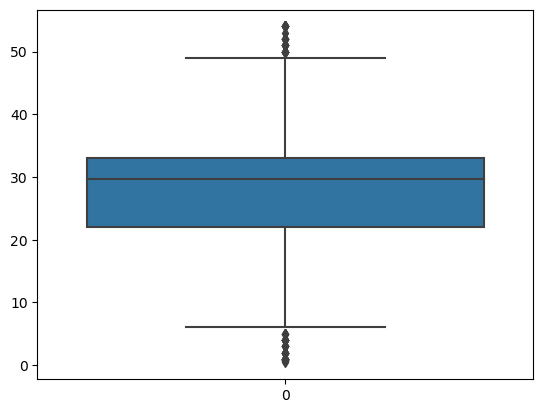

In [24]:
sns.boxplot(data.Age)

<Axes: >

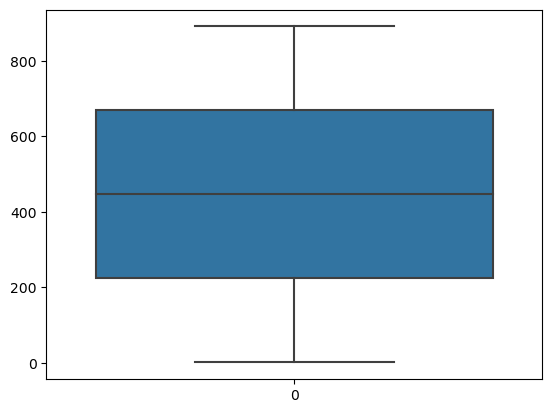

In [25]:
sns.boxplot(data.PassengerId)

<Axes: >

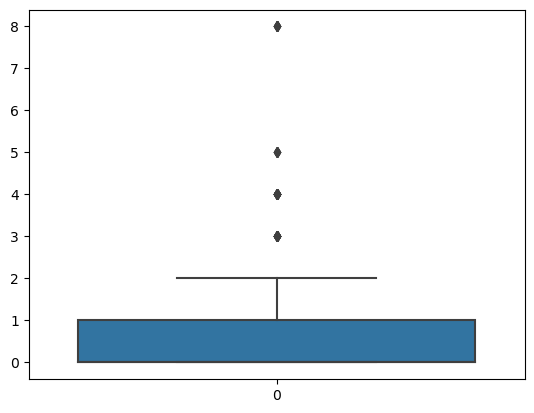

In [26]:
sns.boxplot(data.SibSp)

In [27]:
p99 = data.SibSp.quantile(0.99)

In [28]:
data = data[data.SibSp<=p99]

<Axes: >

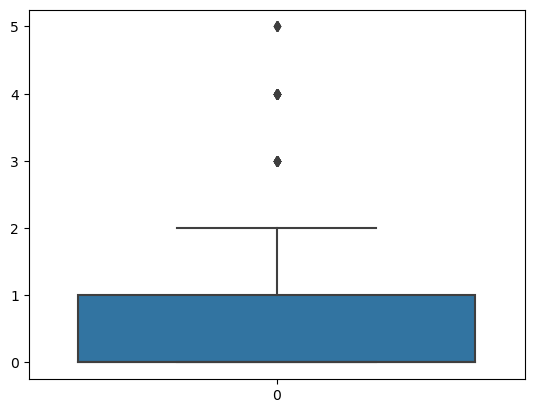

In [29]:
sns.boxplot(data.SibSp)

In [30]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Perform encoding

In [31]:
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [33]:
x=data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=data["Survived"]

In [34]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [35]:

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Splitting data into train and test

In [36]:
from sklearn.model_selection import train_test_split


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(884, 7) (707, 7) (177, 7)


In [39]:
#hence binary classification so we use logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model =  LogisticRegression()

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
x_train_prediction = model.predict(x_train)

In [44]:
print(x_train_prediction)

[1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0
 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("ACCuracy score of training data:",training_data_accuracy)

ACCuracy score of training data: 0.7934936350777935


In [47]:
#out of 100 we get 80 correct

In [48]:
x_test_prediction = model.predict(x_test)
print(x_test_prediction)

[1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1
 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1]


In [49]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("ACCuracy score of testing data:",training_data_accuracy)

ACCuracy score of testing data: 0.7934936350777935
